# Subway Data Analysis

## Introduction

O sistema de ônibus e trens de Nova Iorque - o Metro Transit Authority - fornece seus dados para download através de  arquivos csv. Uma das informações disponíveis são os dados das catracas do metrô que contém logs semanais de entradas cumulativas e saídas por catraca por estação de metrô em algum intervalo de tempo.


Neste projeto iremos utilizar apenas os das catraca disponíveis em: http://web.mta.info/developers/turnstile.html.


## Seção 1 - Coleta de Dados

### *Exercicio 1.1*

Mãos a obra!! 
Coletando os dados. 
Baixe os arquivos do mês de junho de 2017. O arquivo deverá ser salvo com o nome turnstile_100617.txt onde 10/06/17 é a data do arquivo.

In [1]:
import urllib
import re
import os
import sys
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import os.path

base_url = "http://web.mta.info/developers/"
data_directory = "data"
filenames = []
master_file_path = data_directory + "/master_file.txt"
mapper_path = "data/mapper_result.txt"
reducer_path = "data/reducer_result.txt"

print("inicializando libs e variaveis")

inicializando libs e variaveis


In [6]:
print('Acessando o servidor de dados...')
with urllib.request.urlopen(base_url + "turnstile.html") as url:
    html = url.read()

soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a', href=re.compile("1706"))

if not os.path.exists(data_directory):
    os.makedirs(data_directory)

print("Baixando os dados do servidor...")
filenames = []
for link in links:
    link_url = link.get('href')
    filename = link_url.split("/")[-1]    
    print('baixando:', link_url)
    current_output_path = data_directory + "/" + filename
    if not os.path.exists(current_output_path):
        urllib.request.urlretrieve(base_url + link.get('href'), current_output_path)
    filenames.append(data_directory + "/" + filename)    

print("download concluido")
print(filenames)

Acessando o servidor de dados...
Baixando os dados do servidor...
baixando: data/nyct/turnstile/turnstile_170624.txt
baixando: data/nyct/turnstile/turnstile_170617.txt
baixando: data/nyct/turnstile/turnstile_170610.txt
baixando: data/nyct/turnstile/turnstile_170603.txt
download concluido
['data/turnstile_170624.txt', 'data/turnstile_170617.txt', 'data/turnstile_170610.txt', 'data/turnstile_170603.txt']


### *Exercicio 1.2*

Escreva uma função que pegue a lista de nomes dos arquivos que você baixou no exercicio 1.1 e consolide-os em um único arquivo. Deve existir apenas uma linha de cabeçalho no arquivo de saida. 

Por exemplo, se o arquivo_1 tiver:
linha 1...
linha 2...

e o outro arquivo, arquivo_2 tiver:
linha 3...
linha 4...
linha 5...

Devemos combinar o arquivo_1 com arquivo_2 em um arquivo mestre conforme abaixo:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
linha 1...
linha 2...
linha 3...
linha 4...
linha 5...


In [7]:
def create_master_turnstile_file(filenames, output_file):
    with open(output_file, 'w') as master_file:        
        master_file.write('C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:            
            
            print("processando " + filename + "...")
            with open(filename) as infile:
                infile.readline()
                for line in infile:
                    master_file.write(line)

create_master_turnstile_file(filenames, master_file_path)
print("mescla de arquivos terminada")


processando data/turnstile_170624.txt...
processando data/turnstile_170617.txt...
processando data/turnstile_170610.txt...
processando data/turnstile_170603.txt...
mescla de arquivos terminada


### *Exercicio 1.3*

Neste exercício, escreva um função que leia o master_file criado no exercicio anterior e carregue-o em um pandas dataframe. Esta função deve filtrar para que o dataframe possua apenas linhas onde a coluna "DESCn" possua o valor "Regular".

Por exemplo, se o data frame do pandas estiver conforme abaixo:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

O dataframe deverá ficar conforme abaixo depois de filtrar apenas as linhas onde a coluna DESCn possua o valor REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [11]:
def filter_by_regular(data):
    data = data[(data['DESCn'] == "REGULAR")]    
    return data

data = pd.read_csv(master_file_path, delimiter=",")
data = filter_by_regular(data)
print(data.head())

    C/A  UNIT       SCP STATION LINENAME DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  16:00:00   

     DESCn  ENTRIESn   EXITSn  
0  REGULAR   6224816  2107317  
1  REGULAR   6224850  2107322  
2  REGULAR   6224885  2107352  
3  REGULAR   6225005  2107452  
4  REGULAR   6225248  2107513  


### *Exercicio 1.4*


Os dados do metrô de NY possui dados cumulativos de entradas e saidas por linha. Assuma que você possui um dataframe chamado df que contém apenas linhas para uma catraca em particular (unico SCP, C/A, e UNIT). A função abaixo deve alterar essas entradas cumulativas para a contagem de entradas desde a última leitura (entradas desde a última linha do dataframe).

Mais especificamente, você deverá fazer duas coisas:

1 - Criar uma nova coluna chamada ENTRIESn_hourly
2 - Inserir nessa coluna a diferença enre ENTRIESn da coluna atual e a da coluna anterior. Se a linha possuir alguma NAN, preencha/substitua por 1.

Dica: as funções do pandas shift() e fillna() pode ser úteis nesse exercicio.

Abaixo tem um exemplo de como seu dataframe deve ficar ao final desse exercicio:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [13]:
def get_hourly_entries(df):
    
    df['ENTRIESn_hourly'] = df['ENTRIESn'] - df['ENTRIESn'].shift(periods=1)
    df["ENTRIESn_hourly"].fillna(1, inplace=True)
    return df

data = get_hourly_entries(data)
print(data.head())

    C/A  UNIT       SCP STATION LINENAME DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  16:00:00   

     DESCn  ENTRIESn   EXITSn  ENTRIESn_hourly  
0  REGULAR   6224816  2107317              1.0  
1  REGULAR   6224850  2107322             34.0  
2  REGULAR   6224885  2107352             35.0  
3  REGULAR   6225005  2107452            120.0  
4  REGULAR   6225248  2107513            243.0  


### *Exercicio 1.5*

Faça o mesmo do exercicio anterior mas agora considerando as saidas, coluna EXITSn.
Para isso crie uma coluna chamada de EXITSn_hourly e insira a diferença entre a coluna EXITSn da linha atual versus a linha anterior. Se tiver algum NaN, preencha/substitua por 0.



In [14]:
def get_hourly_exits(df):
        
    df['EXITSn_hourly'] = df['EXITSn'] - df['EXITSn'].shift(periods=1)
    df['EXITSn_hourly'].fillna(0, inplace=True)
    return df

data = get_hourly_exits(data)
print(data.head())



    C/A  UNIT       SCP STATION LINENAME DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/17/2017  16:00:00   

     DESCn  ENTRIESn   EXITSn  ENTRIESn_hourly  EXITSn_hourly  
0  REGULAR   6224816  2107317              1.0            0.0  
1  REGULAR   6224850  2107322             34.0            5.0  
2  REGULAR   6224885  2107352             35.0           30.0  
3  REGULAR   6225005  2107452            120.0          100.0  
4  REGULAR   6225248  2107513            243.0           61.0  


### *Exercicio 1.6*

Dado uma variável de entrada que representa o tempo no formato de:
     "00:00:00" (hora: minutos: segundos)
    
Escreva uma função para extrair a parte da hora do tempo variável de entrada
E devolva-o como um número inteiro. Por exemplo:
         
         1) se a hora for 00, seu código deve retornar 0
         2) se a hora for 01, seu código deve retornar 1
         3) se a hora for 21, seu código deve retornar 21
        
Por favor, devolva a hora como um número inteiro.


In [42]:
def time_to_hour(time):
    
    hour = int(time.split(":")[0])
    return hour


## Exercicio 2 - Análise dos dados

### *Exercicio 2.1*

Para verificar a relação entre o movimento do metrô e o clima, precisaremos complementar os dados do arquivo já baixado com os dados do clima.
Nós complementamos para você este arquivo com os dados de clima de Nova Iorque  e disponibilizamos na área de materiais do projeto. Você pode acessa-lo pelo link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Agora que temos nossos dados em um arquivo csv, escreva um código python que leia este arquivo e salve-o em um data frame do pandas. 

Dica: 

Utilize o comando abaixo para ler o arquivo:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [15]:
print("baixando arquivos do tempo...")
weather_path = data_directory + "/data_master_weather.csv"
if not os.path.exists(weather_path):
    urllib.request.urlretrieve("https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv", weather_path) 
    
print("download concluido")

weather_data = pd.read_csv(weather_path, sep=",")
print(weather_data.head())

baixando arquivos do tempo...
download concluido
   Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  ENTRIESn_hourly  \
0           0  R001  2011-05-01  01:00:00     1  REGULAR              0.0   
1           1  R001  2011-05-01  05:00:00     5  REGULAR            217.0   
2           2  R001  2011-05-01  09:00:00     9  REGULAR            890.0   
3           3  R001  2011-05-01  13:00:00    13  REGULAR           2451.0   
4           4  R001  2011-05-01  17:00:00    17  REGULAR           4400.0   

   EXITSn_hourly  maxpressurei  maxdewpti   ...     meandewpti  meanpressurei  \
0            0.0         30.31       42.0   ...           39.0          30.27   
1          553.0         30.31       42.0   ...           39.0          30.27   
2         1262.0         30.31       42.0   ...           39.0          30.27   
3         3708.0         30.31       42.0   ...           39.0          30.27   
4         2501.0         30.31       42.0   ...           39.0          30.27   

 

### *Exercicio 2.2*

Agora crie uma função que calcule a quantidade de dias chuvosos, para isso retorne a contagem do numero de dias onde a coluna *"rain"* é igual a 1.

Dica: Você também pode achar que a interpretação de números como números inteiros ou float pode não
     funcionar inicialmente. Para contornar esta questão, pode ser útil converter
     esses números para números inteiros. Isso pode ser feito escrevendo cast (coluna como inteiro).
     Então, por exemplo, se queríamos lançar a coluna maxtempi como um número inteiro, nós devemos
     escrever algo como cast (maxtempi as integer) = 76, em oposição a simplesmente
     onde maxtempi = 76.

In [16]:
def num_rainy_days(df):
    rainDays = df.groupby(by=['rain', 'DATEn'])['rain'].count()
    return rainDays[1.0].count()

rainy_days = num_rainy_days(weather_data)
print("número de dias chuvosos:", rainy_days)

número de dias chuvosos: 10


### *Exercicio 2.3*

Calcule se estava nebuloso ou não (0 ou 1) e a temperatura máxima para fog (isto é, a temperatura máxima 
     para dias nebulosos).

In [17]:
def max_temp_aggregate_by_fog(df):
        
    maxTemp = df.groupby(by=['fog'])['maxtempi'].max()
    return maxTemp[1.0]
    
max_temp_on_fog = max_temp_aggregate_by_fog(weather_data)
print("temperatura máxima em dias chuvosos:", max_temp_on_fog)

temperatura máxima em dias chuvosos: 81.0


### *Exercicio 2.4

Calcule agora a média de 'meantempi' nos dias que são sábado ou domingo (finais de semana):

In [18]:
def avg_weekend_temperature(df):
  
    df['DATEn'] = pd.to_datetime(df['DATEn'])
    meantempi = np.average(df[(df['DATEn'].dt.weekday >= 5)]['meantempi'])
    return meantempi

avg_temp_weekend = avg_weekend_temperature(weather_data)
print("temperatura média nos fins de semana:", avg_temp_weekend)

temperatura média nos fins de semana: 65.10066685403307


### *Exercicio 2.5

Calcule a média da temperatura mínima 'mintempi' nos dias chuvosos onde da temperatura mínima foi maior que do 55 graus:

In [19]:
def avg_min_temperature(df):
    
    avg_min_temp_rainy = np.average(df[(df['mintempi'] > 55) & (df['rain'] == 1.0)]['mintempi'])    
    return avg_min_temp_rainy

avg_min_temperature= avg_min_temperature(weather_data)
print("temperatura minima em dias chuvosos com minimo de 55 graus:", avg_min_temperature)

temperatura minima em dias chuvosos com minimo de 55 graus: 61.238860398860396


### *Exercicio 2.6

Antes de realizar qualquer análise, pode ser útil olhar para os dados que esperamos analisar. Mais especificamente, vamos examinR as entradas por hora em nossos dados do metrô de Nova York para determinar a distribuição dos dados. Estes dados são armazenados na coluna ['ENTRIESn_hourly'].
    
Trace dois histogramas nos mesmos eixos para mostrar as entradas quando esta chovendo vs quando não está chovendo. 
Abaixo está um exemplo sobre como traçar histogramas com pandas e matplotlib:
     
```python
Turnstile_weather['column_to_graph'].Hist()
```   
    

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


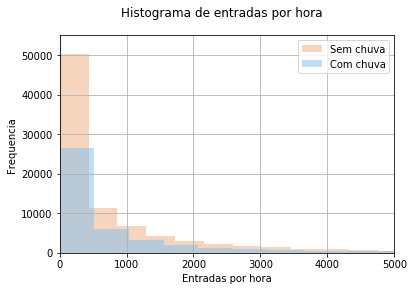

In [20]:
def entries_histogram(df):
    
    bins = 100
    alpha = 0.5
    xmin = 0
    ymin = 0
    xmax = 5000
    ymax = 55000

    plt.figure()

    df['ENTRIESn_hourly'][df['rain'] == 0.0].hist(bins=bins, alpha=alpha, color="#EEAC7E")
    df['ENTRIESn_hourly'][df['rain'] == 1.0].hist(bins=bins, alpha=alpha, color="#7EC0EE")

    plt.axis([xmin, xmax, ymin, ymax])
    plt.suptitle('Histograma de entradas por hora')
    plt.xlabel('Entradas por hora')
    plt.ylabel('Frequencia')
    plt.legend(['Sem chuva', 'Com chuva'])

    return plt

entries_histogram(weather_data)
print(plt)

### *Exercicio 2.7

Os dados que acabou de plotar que tipo de ditribuição? Existe diferença na distribuição entre dias chuvosos e não chuvosos?

** Resposta **: Ambas as distribuições seguem o mesmo padrão, sendo as duas inclinadas ou seja, são assimétricas e em ambos os casos positivas.
A diferença mais aparente a primeira vista é que em dias não chuvosos normalmente há maior número de pessoas utilizando o metrô em momentos de poucas entradas por hora, talvez sendo momentos já de pouco movimento e com agravante da chuva diminui bastante a ida ao metrô, nos demais momentos os histogramas seguem com diferença pouca em volume de dados.

### *Exercicio 2.8

Construa uma função que que retorne:

1. A média das entradas com chuva
2. A média das entradas sem chuva




In [21]:
def means(turnstile_weather):
        
    with_rain_mean = np.average(turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 0.0])
    without_rain_mean = np.average(turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 1.0])
    p = "?"
    
    print(with_rain_mean, without_rain_mean)
    return with_rain_mean, without_rain_mean, p # leave this line for the grader #what is "p"?

with_rain_mean, without_rain_mean, p = means(weather_data)

1090.278780151855 1105.4463767458733


Responda as perguntas abaixo de acordo com a saida das suas funções:

1. Qual a média das entradas com chuva?
2. Qual a média das entradas sem chuva?


In [12]:
print("a média das entradas com chuva:", with_rain_mean)

a média das entradas com chuva: 1090.278780151855


In [13]:
print("a média das entradas sem chuva:", without_rain_mean)

a média das entradas sem chuva: 1105.4463767458733


** Resposta **: As médias são 1090.27 e 1105.44 para dias com chuva e sem chuva respectivamente.

## Exercicio 3 - Map Reduce

### *Exercicio 3.1*

A entrada para esse exercício e o mesmo arquivo da seção anterior (Exercicio 2). Você pode baixar o arquivo neste link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Varmos criar um mapeador agora. Para cada linha de entrada, a saída do mapeador deve IMPRIMIR (não retornar) a UNIT como uma chave e o número de ENTRIESn_hourly como o valor. Separe a chave e o valor por uma guia. Por exemplo: 'R002 \ t105105.0'

Exporte seu mapeador em um arquivo chamado mapper_result.txt e envie esse arquivo juntamente com a sua submissão. O código para exportar seu mapeador já está escrito no código abaixo.




In [22]:
def mapper():
    sys.stdin.readline()
    for line in sys.stdin:
        # your code here
        #print(line)
        data = line.split(',')
        unit = data[1]
        entriesn_hourly = data[6]
        print('{0}\t{1}'.format(unit, entriesn_hourly))

sys.stdin = open(weather_path)
sys.stdout = open(mapper_path, 'w')
mapper()

In [ ]:
### *Exercicio 3.2*

Agora crie o redutor. Dado o resultado do mapeador do exercicio anterior, o redutor deve imprimir(Não retornar) uma linha por UNIT, juntamente com o número total de ENTRIESn_hourly.Ao longo de maio (que é a duração dos nossos dados), separados por uma guia. Um exemplo de linha de saída do redutor pode ser assim: 'R001 \ t500625.0'

Você pode assumir que a entrada para o redutor está ordenada de tal forma que todas as linhas correspondentes a uma unidade particular são agrupados. No entanto a saida do redutor terá repetição pois existem lojas que aparecem em locais diferentes dos arquivos.

Exporte seu redutor em um arquivo chamado reducer_result.txt e envie esse arquivo juntamente com a sua submissão.

In [23]:
def reducer():
    
    previousUnit = ""
    currentUnit = ""
    entriesCount = 0
    
    previousUnit, entriesCount = sys.stdin.readline().split('\t')
    entriesCount = float(entriesCount.rstrip())
    
    for line in sys.stdin:
        currentUnit, entries = line.split('\t')
        entries = float(entries.rstrip())
        
        if currentUnit == previousUnit:
            entriesCount += entries
        else:
            print('{0}\t{1}'.format(previousUnit, entriesCount))
            entriesCount = entries
            
        previousUnit = currentUnit
    print('{0}\t{1}'.format(previousUnit, entriesCount))
    
sys.stdin = open(mapper_path)
sys.stdout = open(reducer_path, 'w')
reducer()